# Import libraries

In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import TSNE

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/02с_dim_reduction'

# Loading data

## Train data (*smoothed & scaled*)

In [4]:
path_to_ftir_data = './../data/preprocessed_data/ftir_scaled_train.csv'

In [5]:
data = pd.read_csv(path_to_ftir_data, index_col=0)

print(data.shape)
data.head(3)

(26, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
wavenumber,1900.766600,1899.802230,1898.837870,1897.873500,1896.909130,1895.944770,1894.980400,1894.016030,1893.051670,1892.087300,1891.122930,1890.158570,1889.194200,1888.229830,1887.265470,1886.301100,1885.336730,1884.372370,1883.408000,1882.44364,1881.479270,1880.514900,1879.550540,1878.586170,1877.621800,...,823.569090,822.604720,821.640360,820.675990,819.711620,818.747260,817.782890,816.818520,815.854160,814.889790,813.925420,812.961060,811.996690,811.032320,810.067960,809.103590,808.139230,807.174860,806.210490,805.246130,804.281760,803.317390,802.353030,801.388660,800.424290
1,0.000494,0.000944,0.001362,0.001750,0.002112,0.002451,0.002770,0.003074,0.003364,0.003646,0.003921,0.004193,0.004467,0.004744,0.005028,0.005324,0.005633,0.005960,0.006308,0.00668,0.007079,0.007509,0.007974,0.008476,0.009019,...,0.037121,0.035323,0.033560,0.031835,0.030152,0.028514,0.026926,0.025390,0.023910,0.022491,0.021135,0.019846,0.018627,0.017483,0.016417,0.015433,0.014533,0.013723,0.013004,0.012382,0.011859,0.011440,0.011127,0.010924,0.010836
2,0.000210,0.000215,0.000213,0.000205,0.000192,0.000175,0.000155,0.000132,0.000109,0.000085,0.000063,0.000042,0.000025,0.000011,0.000003,0.000000,0.000004,0.000017,0.000039,0.00007,0.000113,0.000168,0.000236,0.000318,0.000415,...,0.072690,0.071565,0.070364,0.069083,0.067721,0.066275,0.064743,0.063123,0.061413,0.059610,0.057713,0.055719,0.053626,0.051432,0.049135,0.046732,0.044221,0.041600,0.038868,0.036021,0.033058,0.029976,0.026773,0.023447,0.019997


## Samples description

In [6]:
path_to_samples_description = './../data/preprocessed_data/ftir_description.csv'

In [7]:
samples_description = pd.read_csv(path_to_samples_description, index_col=0)

samples_description.index = samples_description.index.astype(str)

print(samples_description.shape)
samples_description.head(3)

(29, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


# Datasets preparation

## FTIR data

In [8]:
data = data.loc['1':]

print(data.shape)
data.head(3)

(25, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
1,0.000494,0.000944,0.001362,0.001750,0.002112,0.002451,0.002770,0.003074,0.003364,0.003646,0.003921,0.004193,0.004467,0.004744,0.005028,0.005324,0.005633,0.005960,0.006308,0.006680,0.007079,0.007509,0.007974,0.008476,0.009019,...,0.037121,0.035323,0.033560,0.031835,0.030152,0.028514,0.026926,0.025390,0.023910,0.022491,0.021135,0.019846,0.018627,0.017483,0.016417,0.015433,0.014533,0.013723,0.013004,0.012382,0.011859,0.011440,0.011127,0.010924,0.010836
2,0.000210,0.000215,0.000213,0.000205,0.000192,0.000175,0.000155,0.000132,0.000109,0.000085,0.000063,0.000042,0.000025,0.000011,0.000003,0.000000,0.000004,0.000017,0.000039,0.000070,0.000113,0.000168,0.000236,0.000318,0.000415,...,0.072690,0.071565,0.070364,0.069083,0.067721,0.066275,0.064743,0.063123,0.061413,0.059610,0.057713,0.055719,0.053626,0.051432,0.049135,0.046732,0.044221,0.041600,0.038868,0.036021,0.033058,0.029976,0.026773,0.023447,0.019997
3,0.002533,0.002476,0.002405,0.002323,0.002230,0.002128,0.002017,0.001899,0.001776,0.001648,0.001517,0.001383,0.001250,0.001116,0.000985,0.000856,0.000732,0.000613,0.000501,0.000397,0.000303,0.000218,0.000146,0.000087,0.000042,...,0.208237,0.205610,0.203011,0.200442,0.197910,0.195416,0.192967,0.190564,0.188213,0.185918,0.183681,0.181509,0.179403,0.177369,0.175410,0.173531,0.171735,0.170026,0.168408,0.166886,0.165463,0.164143,0.162931,0.161829,0.160843


## Samples descriprion

In [9]:
samples_description = samples_description.loc[samples_description['Label'] == 'Train']

print(samples_description.shape)
samples_description.head(3)

(25, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


In [10]:
type_dict = {
    '$rGO$': '$вОГ$',
    '$GO$': '$ОГ$',
    '$GO_{d}$': '$ОГ_{диализ}$',
}

samples_description['Type'] = samples_description['Type'].apply(lambda x: type_dict[x])

print(samples_description.shape)
samples_description.head(3)

(25, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$ОГ$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$ОГ$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$ОГ$,1,Train


In [11]:
hue = samples_description['Type'].tolist()

In [12]:
figsize = (10.5, 6)
markersize = 512 # 1024

fontsize = 16

# Dimensionality reduction

## Class for dimensionality reduction

In [13]:
class DimensionalityReduction():
    def __init__(self, data, hue=None):
        
        self.data = data
        
        if hue is not None:
            # hue must be list
            self.hue = hue

    def get_pca(self, n_components=2, random_state=42):
        pca = PCA(n_components=n_components, random_state=random_state)
        pca_data = pca.fit_transform(self.data)

        columns = [f'pc_{i}' for i in range(1, n_components+1)]
        pca_data = pd.DataFrame(pca_data, columns=columns)

        explained_variance = [round(k, 4) for k in pca.explained_variance_ratio_]

        self.pca_data = pca_data
        self.explained_variance = explained_variance

    def get_lda(self, target, n_components=2):
        lda = LinearDiscriminantAnalysis(n_components=n_components, solver='svd')
        lda_data = lda.fit_transform(self.data, np.array(target))

        columns = [f'ax_{i}' for i in range(1, n_components+1)]
        lda_data = pd.DataFrame(lda_data, columns=columns)

        self.lda_data = lda_data

    def get_nmf(self, n_components=2, random_state=42):
        nmf = NMF(n_components=n_components, init='nndsvd', max_iter=100_000, random_state=42)
        nmf_data = nmf.fit_transform(self.data)

        columns = [f'ax_{i}' for i in range(1, n_components+1)]
        nmf_data = pd.DataFrame(nmf_data, columns=columns)

        self.nmf_data = nmf_data

    def get_tsne(self, n_components=2, learning_rate=1e1, init='pca', perplexity=5, n_iter=10_000, random_state=42):
        tsne = TSNE(n_components=2,
                    learning_rate=learning_rate,
                    init=init,
                    perplexity=perplexity,
                    n_iter=n_iter,
                    random_state=random_state
                   )
        tsne_data = tsne.fit_transform(self.data)

        columns = [f'ax_{i}' for i in range(1, n_components+1)]
        tsne_data = pd.DataFrame(tsne_data, columns=columns)

        self.tsne_data = tsne_data

    def get_visualization(self, method='pca', figsize=(16, 9), palette='Dark2', markersize=14, fontstyle='normal', fontsize=14, path_to_save=None, dpi=300):
        if method == 'pca':
            data = self.pca_data
        elif method == 'lda':
            data = self.lda_data
        elif method == 'nmf':
            data = self.nmf_data
        elif method == 'tsne':
            data = self.tsne_data
        
        sns.set_theme()

        fig = plt.figure(figsize=figsize)
        ax = fig.gca()

        columns = data.columns

        sns.scatterplot(data=data,
                        x=columns[0],
                        y=columns[1],
                        hue=self.hue,
                        palette=palette,
                        s=markersize)

        if method == 'pca':
            xlabel = f'Главная компонента 1 \n (PoEV = {self.explained_variance[0]})'
            ylabel = f'Главная компонента 2 \n (PoEV = {self.explained_variance[1]})'
        else:
            xlabel = f'Ось 1'
            ylabel = f'Ось 2'
        
        ax.set_xlabel(xlabel, fontstyle=fontstyle, fontsize=fontsize, labelpad=5)
        ax.set_ylabel(ylabel, fontstyle=fontstyle, fontsize=fontsize, labelpad=5)
        
        legend = ax.legend(loc='best', fontsize=16, markerscale=0.7)
        # for handle in legend.legend_handles:
        #     handle.set_sizes([markersize // 4])
        
        plt.tight_layout()

        if path_to_save is not None:
            plt.savefig(path_to_save, dpi=600)
        
        plt.show()

## PCA

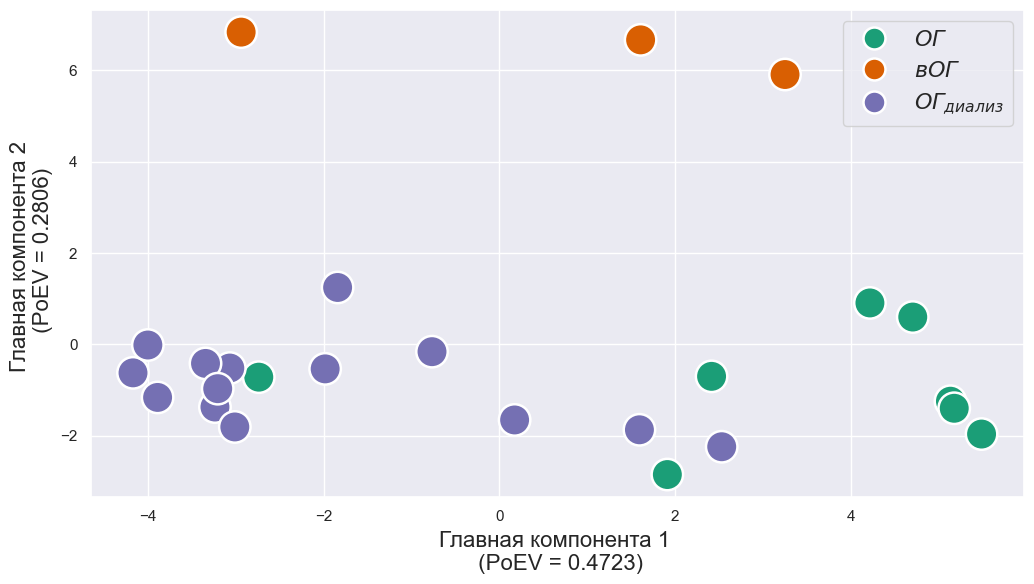

In [14]:
dimred = DimensionalityReduction(data=data, hue=hue)

dimred.get_pca(n_components=2, random_state=42)
dimred.get_visualization(method='pca', figsize=figsize, markersize=markersize, fontsize=fontsize, path_to_save=f'{path_to_save}/pca.png')

## LDA

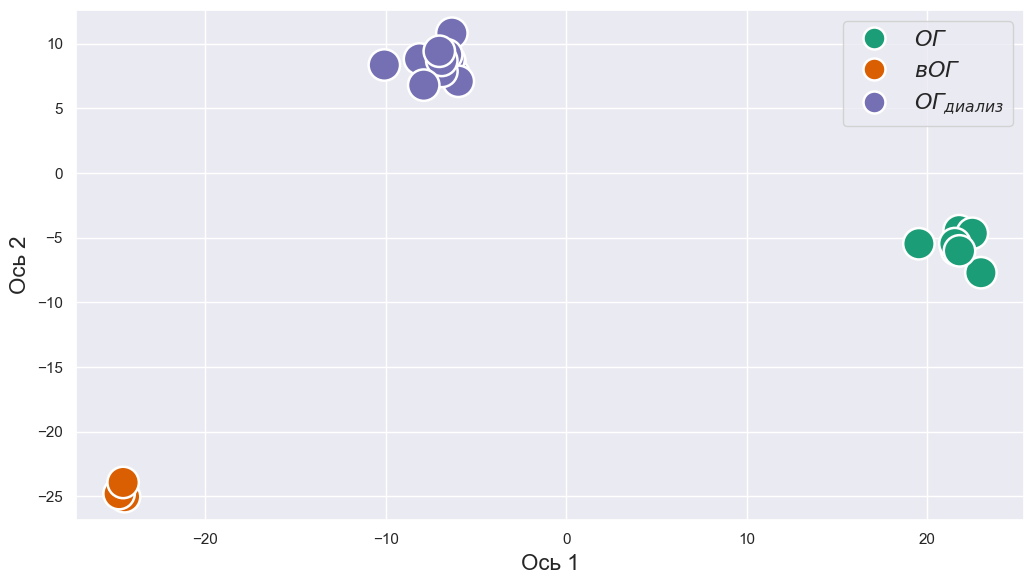

In [15]:
target = samples_description['Class']

dimred = DimensionalityReduction(data=data, hue=hue)

dimred.get_lda(target=target, n_components=2)
dimred.get_visualization(method='lda', figsize=figsize, markersize=markersize, fontsize=fontsize, path_to_save=f'{path_to_save}/lda.png')

## NMF

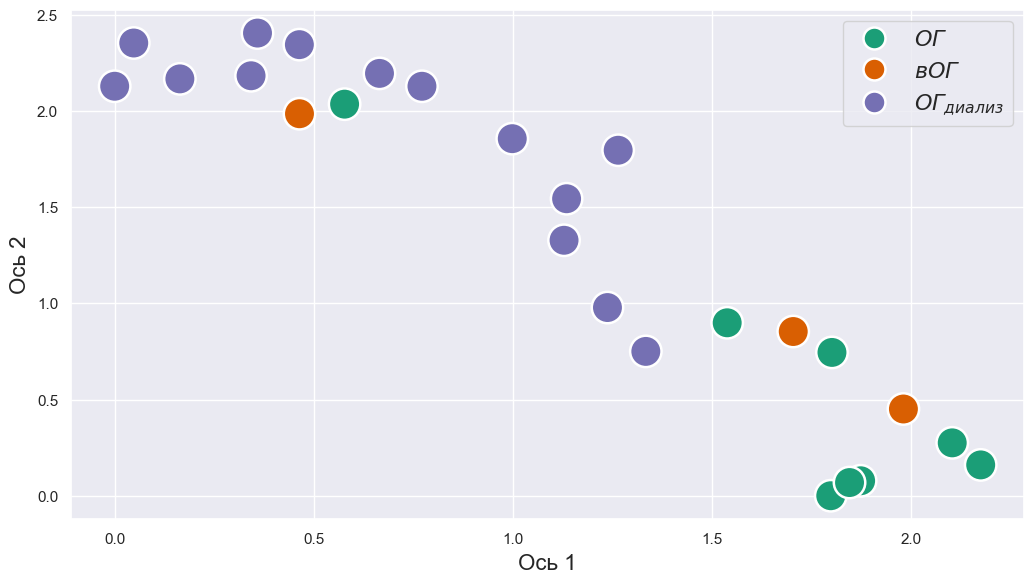

In [16]:
dimred = DimensionalityReduction(data=data, hue=hue)

dimred.get_nmf(n_components=2, random_state=42)
dimred.get_visualization(method='nmf', figsize=figsize, markersize=markersize, fontsize=fontsize, path_to_save=f'{path_to_save}/nmf.png')

## t-SNE

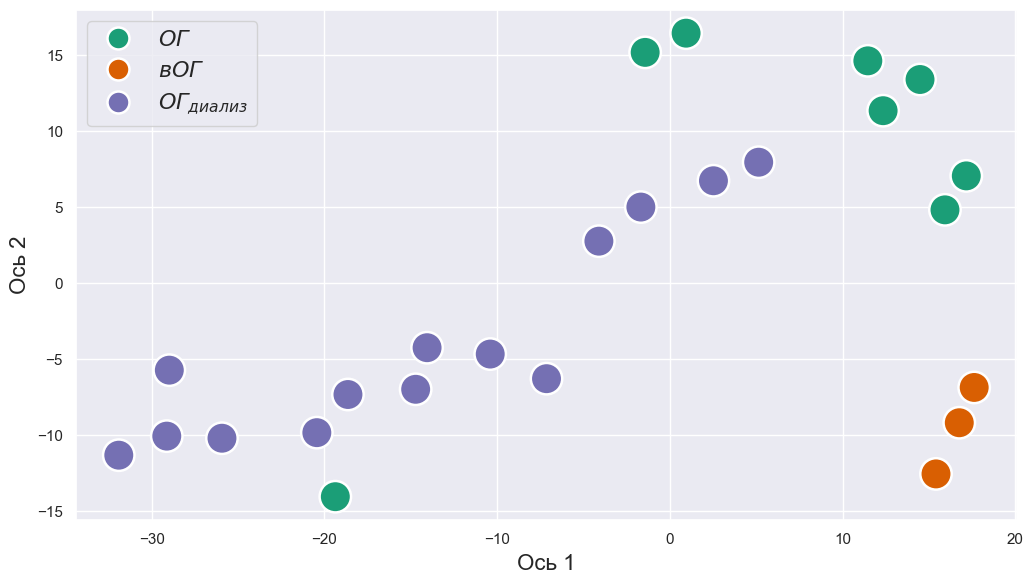

In [17]:
dimred = DimensionalityReduction(data=data, hue=hue)

dimred.get_tsne(n_components=2, perplexity=4, random_state=42)
dimred.get_visualization(method='tsne', figsize=figsize, markersize=markersize, fontsize=fontsize, path_to_save=f'{path_to_save}/tsne.png')